# Gold & AAPL Price Prediction using Machine Learning with Python

In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

# Settings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Download historical data for Gold via SPDR Gold Shares ETF (GLD)
df = yf.download('GLD',
                 start='2001-01-01',
                 end='2024-05-31',
                 progress=False)

# Display the first few rows of the dataset
print(df.head())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-11-18  44.430000  44.490002  44.070000  44.380001  44.380001   5992000
2004-11-19  44.490002  44.919998  44.470001  44.779999  44.779999  11655300
2004-11-22  44.750000  44.970001  44.740002  44.950001  44.950001  11996000
2004-11-23  44.880001  44.919998  44.720001  44.750000  44.750000   3169200
2004-11-24  44.930000  45.049999  44.790001  45.049999  45.049999   6105100


In [3]:
# Calculate the daily return as a percentage and create a lagged return column
df['Return'] = df['Adj Close'].pct_change() * 100
df['Lagged_Return'] = df['Return'].shift()

# Drop rows with NaN values (created by pct_change and shift)
df = df.dropna()

# Split the dataset into training (2001-2021) and testing (2022-2023) periods
train = df.loc['2001':'2021']
test = df.loc['2022':'2023']

# Create training and testing sets for independent (X) and dependent (y) variables
X_train = train['Lagged_Return'].to_frame()
y_train = train['Return']
X_test = test['Lagged_Return'].to_frame()
y_test = test['Return']

# Display the head of the training dataset to verify the setup
print(X_train.head(), y_train.head())

            Lagged_Return
Date                     
2004-11-22       0.901302
2004-11-23       0.379638
2004-11-24      -0.444941
2004-11-26       0.670389
2004-11-29       0.532745 Date
2004-11-22    0.379638
2004-11-23   -0.444941
2004-11-24    0.670389
2004-11-26    0.532745
2004-11-29    0.242881
Name: Return, dtype: float64


## Using Linear Regression Model

In [4]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

In [5]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print out the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.816671633021052
Mean Absolute Error: 0.687549192251779
R-squared: 6.447065462622525e-05


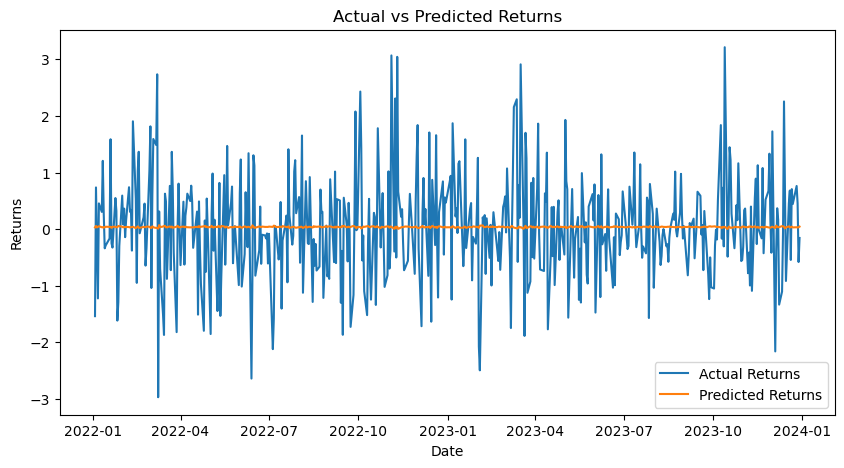

In [6]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(test.index, y_test, label="Actual Returns")
plt.plot(test.index, predictions, label="Predicted Returns")
plt.legend()
plt.title("Actual vs Predicted Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()

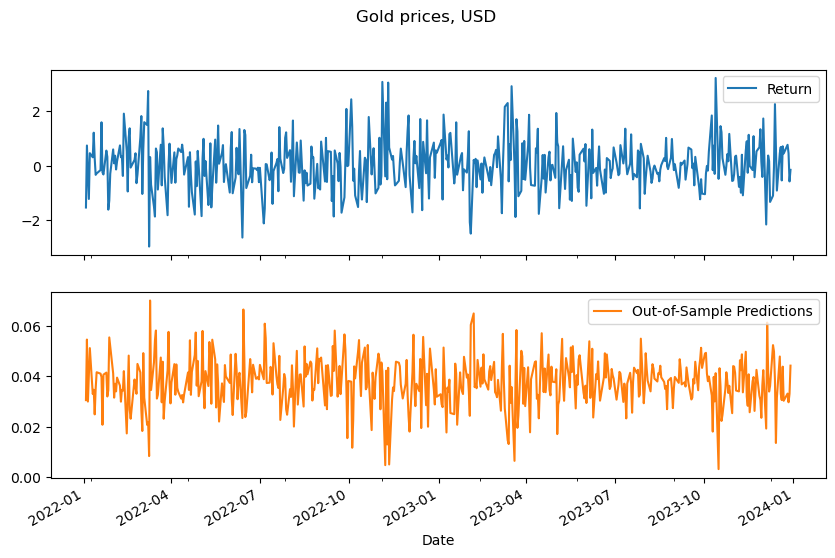

In [7]:
# Add a column of "out-of-sample" predictions to the out_of_sample_results DataFrame
out_of_sample_results = y_test.to_frame()
out_of_sample_results["Out-of-Sample Predictions"] = predictions

# Plot the actual returns and out-of-sample predictions
out_of_sample_results.plot(subplots=True, title='Gold prices, USD', figsize=(10, 6))
plt.show()

In [8]:
# Download stock data
ticker = 'AAPL'  # Example ticker
data = yf.download(ticker, start='2020-01-01', end='2023-12-31')

# Display the first few rows of the dataset
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.960457  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.251129  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.826866  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.484344  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.650360  132079200


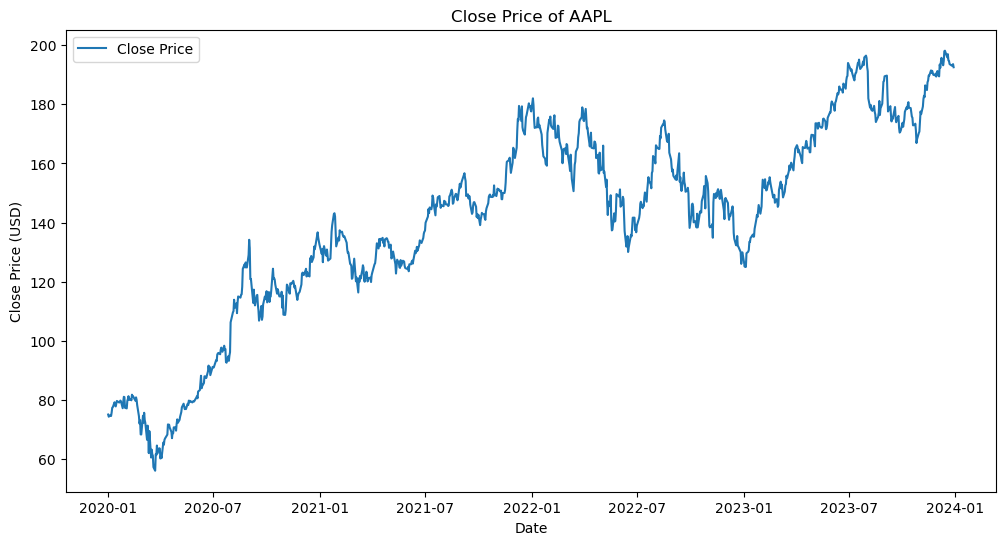

In [9]:
# Plotting the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Close Price of AAPL')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [10]:
# Prepare data for linear regression
data['Date'] = data.index
data['Date'] = pd.to_datetime(data['Date'])
data['Date_ordinal'] = data['Date'].map(pd.Timestamp.toordinal)

# Define the feature and target variable
X = np.array(data['Date_ordinal']).reshape(-1, 1)
y = np.array(data['Close'])

In [11]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Model score on test data
print("Model Score:", model.score(X_test, y_test))

# Predict the closing prices using the model
predictions = model.predict(X_test)

Model Score: 0.2626215449670811


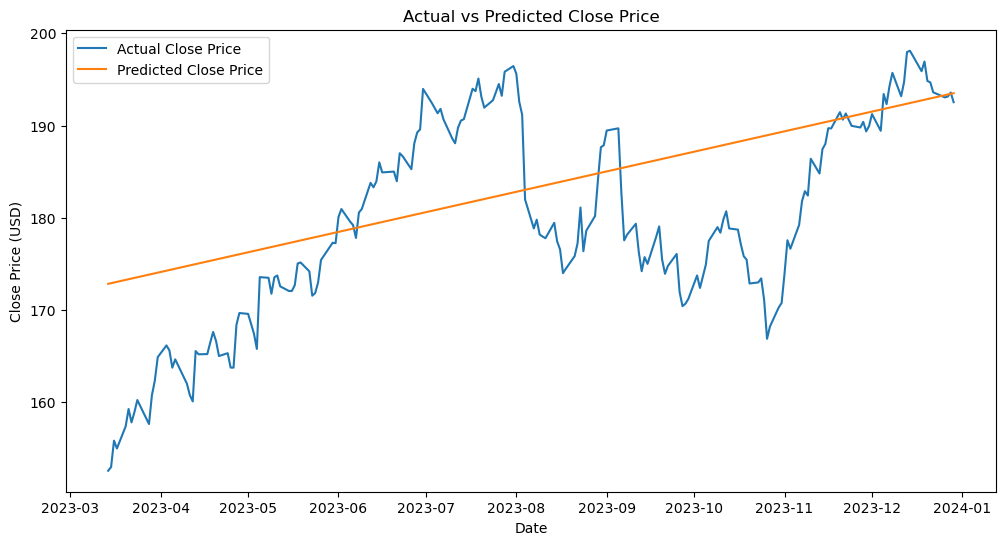

In [13]:
# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][train_size:], y_test, label='Actual Close Price')
plt.plot(data['Date'][train_size:], predictions, label='Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [14]:
# Predict future closing price based on a specific date
future_date = pd.to_datetime('2024-12-31')
future_date_ordinal = np.array([[future_date.toordinal()]])
future_price = model.predict(future_date_ordinal)

print(f"Predicted Closing Price on {future_date.date()}: ${future_price[0]:.2f}")

Predicted Closing Price on 2024-12-31: $219.73
